In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray,rgb2lab,lab2rgb
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model,baselinish,simpler_model,baselinish2,complex_pokemon_model2


In [2]:
X_train,X_test,Y_train, Y_test = load_data()
print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

print (Y_train.dtype)
lab_data = rgb2lab(Y_train)

mean_val = np.mean(Y_train)
print (np.max(Y_train))
print (np.min(Y_train))
print (mean_val)
#Y_train = Y_train - mean_val
print (np.max(Y_train))
print (np.min(Y_train))
#print (lab_data.shape) 
#lab_data,mean_dat,std_dat = normalise_train(lab_data)

0
(49, 64, 64, 1)
(13, 64, 64, 1)
(49, 64, 64, 3)
(13, 64, 64, 3)
uint8
255
0
96.6026669457
255
0


(49, 64, 64, 3)
(64, 64, 3)
(64, 64, 3)


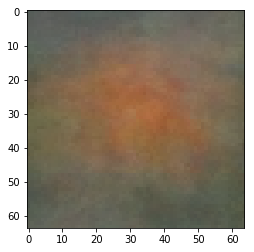

In [22]:
Y_train,mean_image,std_image = normalise_train(Y_train)
print (Y_train.shape)
print (mean_image.shape)
print (std_image.shape)
plt.imshow(mean_image[:,:,:].astype('uint8'))
plt.show()
#X_test = normalise_test(X_test,mean_image,std_image)
#print(X_test.shape)
#print (X_train.shape)

In [5]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 64, 64,1])
Y = tf.placeholder(tf.float32 ,[None , 64,64,3])
is_training = tf.placeholder(tf.bool)

with tf.variable_scope("model") as scope:
    y_out = complex_pokemon_model(X)
    loss = tf.sqrt(tf.nn.l2_loss(y_out-Y))
    optimiser = tf.train.AdamOptimizer(1e-4)
    train_step = optimiser.minimize(loss)

    scope.reuse_variables()
    test_model = complex_pokemon_model(X,False)
    loss_test = tf.sqrt(tf.nn.l2_loss(test_model - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 32
def train_epoch(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:   (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:True}
        losses,_ = sess.run([loss,train_step],feed_dict)
        if(i%5==0):
            print (losses)

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 10
for i in range(num_epochs):
    train_epoch(X_train, Y_train)
    val_result(X_test, Y_test)

    



KeyboardInterrupt: 

In [9]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd

#def rgb2gray2(rgb):
 #   a = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  #  return a

rand_indices = np.random.choice(400,10)
sample_images = X_train[rand_indices]
samp = Y_train[rand_indices]
print (sample_images.shape)
grayed_sample_images = (sample_images)
print (grayed_sample_images.shape)

feed_dict = {X:grayed_sample_images[:,:,:],Y:samp,is_training:True}
model_generated_images = sess.run([test_model,loss_test],feed_dict)
print (model_generated_images[1])
print(model_generated_images[0].shape)

def show_images(images,gray = False):

    
    if(gray):
        plt.subplot(221)
        plt.imshow(images[0],cmap = plt.get_cmap('gray'))
        plt.subplot(222)
        plt.imshow(images[1], cmap = plt.get_cmap('gray'))
        plt.subplot(223)
        plt.imshow(images[2], cmap = plt.get_cmap('gray'))
        plt.subplot(224)
        plt.imshow(images[3], cmap = plt.get_cmap('gray'))
    else :
        plt.subplot(221)
        plt.imshow(images[0]);
        plt.subplot(222)
        plt.imshow(images[1])
        plt.subplot(223)
        plt.imshow(images[2])
        plt.subplot(224)
        plt.imshow(images[3])

    plt.show()
    
    
show_images((samp))
#show_images(grayed_sample_images,gray = True)
show_images((model_generated_images[0]) )

    

IndexError: index 168 is out of bounds for axis 0 with size 49

In [4]:
def show_images(images,gray = False):

    
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);

    plt.show()

(49, 64, 64, 3)
1.58442


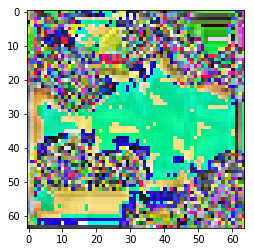

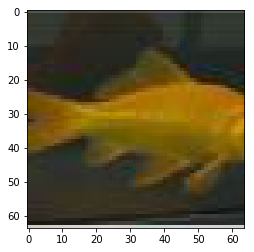

2.03689


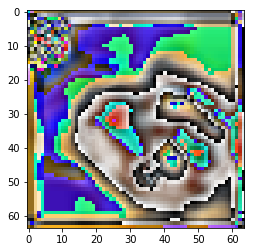

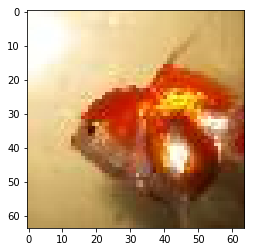

Next Epoch 0
1.86039
4.10261
Next Epoch 1
0.715459
0.552598
Next Epoch 2
0.6714
0.360537
Next Epoch 3
0.242421
0.213369
Next Epoch 4
0.168131


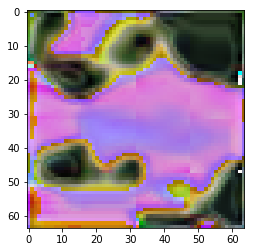

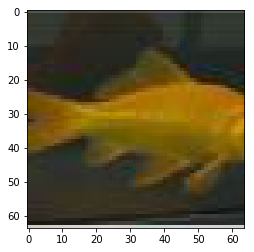

0.168723


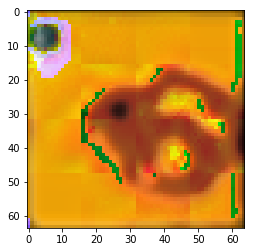

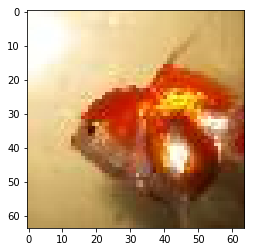

Next Epoch 5
0.144278
0.159721
Next Epoch 6
0.167661
0.155442
Next Epoch 7
0.139795
0.112815
Next Epoch 8
0.135419
0.115885
Next Epoch 9
0.122565


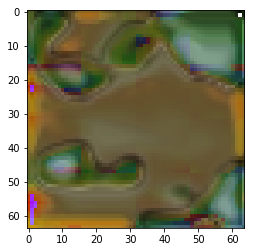

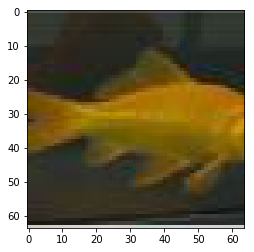

0.0991303


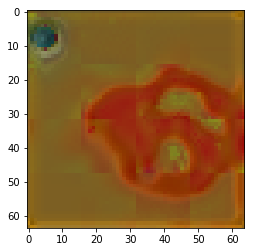

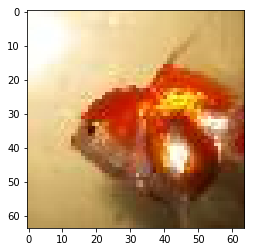

Next Epoch 10
0.096408
0.104713
Next Epoch 11
0.0994865
0.113111
Next Epoch 12
0.0921785
0.0910834
Next Epoch 13
0.0906333
0.091862
Next Epoch 14
0.097871


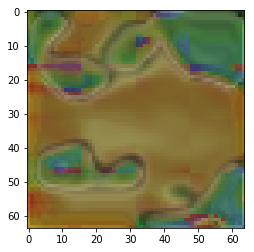

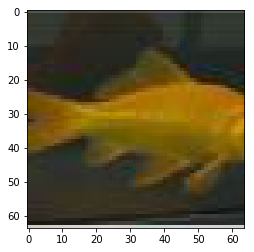

0.0879179


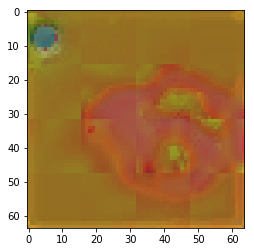

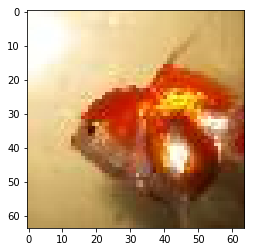

Next Epoch 15
0.0937142
0.0884227
Next Epoch 16
0.0912678
0.090879
Next Epoch 17
0.0854787
0.0885655
Next Epoch 18
0.0829113
0.0880977
Next Epoch 19
0.0842033


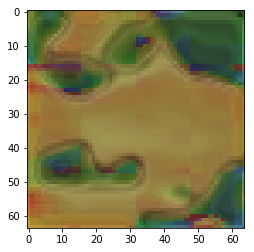

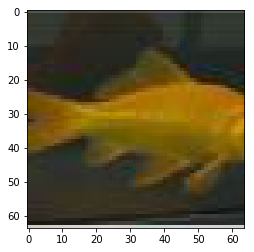

0.0855911


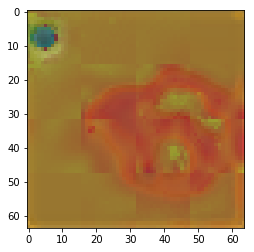

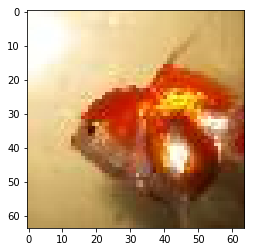

Next Epoch 20
0.0829042
0.0842462
Next Epoch 21
0.0836996
0.0836484
Next Epoch 22
0.0831762
0.0820267
Next Epoch 23
0.0830559
0.0823873
Next Epoch 24
0.0826252


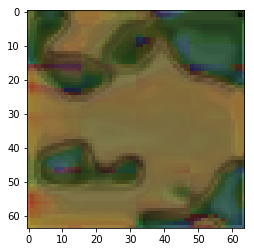

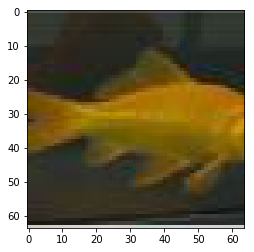

0.0816739


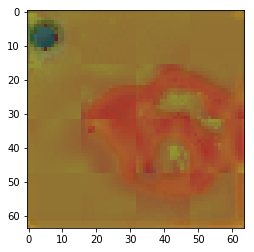

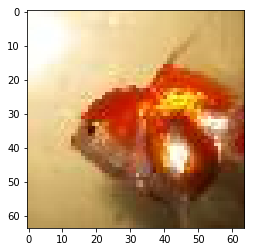

Next Epoch 25
0.0810132
0.0811614
Next Epoch 26
0.0810395
0.0819057
Next Epoch 27
0.0803754
0.0816979
Next Epoch 28
0.0796145
0.0819555
Next Epoch 29
0.0795935


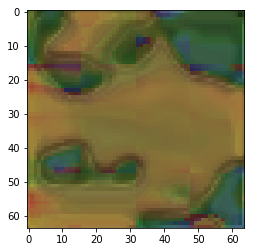

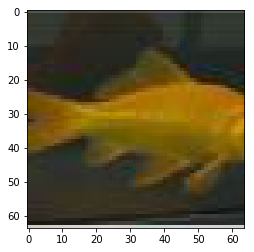

0.0816565


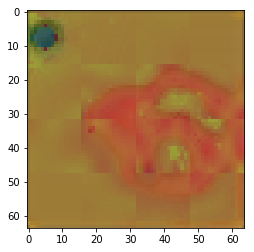

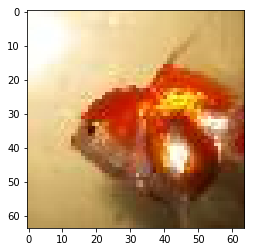

Next Epoch 30
0.0795663
0.0810158
Next Epoch 31
0.0799032
0.0806647
Next Epoch 32
0.0799604
0.0803031
Next Epoch 33
0.0797444
0.0806054
Next Epoch 34
0.0793691


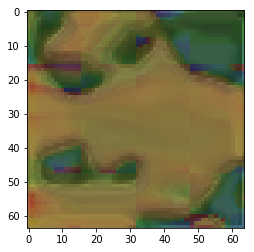

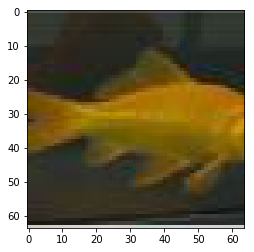

0.0808437


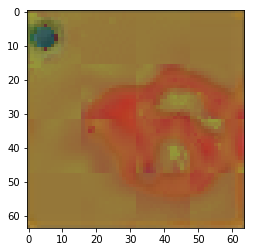

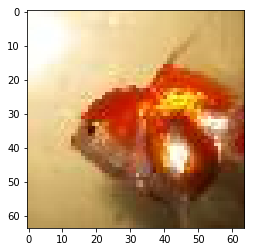

Next Epoch 35
0.0790824
0.0807187
Next Epoch 36
0.0792285
0.0803461
Next Epoch 37
0.0794019
0.0800765
Next Epoch 38
0.0794435
0.0800879
Next Epoch 39


In [5]:
tf.reset_default_graph()

#X = tf.placeholder(tf.float32, [None, 64, 64,1])

Y = tf.placeholder(tf.uint8 ,[None , 64,64,3])

is_training = tf.placeholder(tf.bool)

#X_train = lab_data[...,0:1]
#Y_train = lab_data[...,1:3]
#print (X_train.shape)
print (Y_train.shape)

with tf.variable_scope("model") as scope:
    #y_out = simpler_model(X)
    #y_out = complex_pokemon_model(X,True)
    hsv_out,rgb_out,hsv_in,rgb_in = baselinish2(Y,is_training)
    #hsv_out,rgb_out,hsv_in,rgb_in = complex_pokemon_model2(Y,is_training)
    loss = tf.reduce_mean(tf.square(hsv_out-hsv_in))
    
    #### A different loss function
    #tf.concat
    #lab2rgb(original_data[0,:,:,:]*std_dat + mean_dat )
    
    optimiser = tf.train.AdamOptimizer(4e-2)
    train_step = optimiser.minimize(loss)

    #scope.reuse_variables()
    #test_model = simpler_model(X,False)
    #test_model = complex_pokemon_model(X,False)
    #test_model = baselinish()
    #loss_test = (tf.nn.l2_loss(test_model - Y))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 24
epoch_number = 0
def train_epoch(target):
    sizee = target.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y: (target[i*batch_size:batch_size*i+batch_size]),is_training:True}
        losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
        #if(i%5==0):
        print (losses)
        if(epoch_number %5 == 0):
            show_images(rgb_o[5])
            show_images(rgb_i[5])

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test,rgb_out],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 40
for i in range(num_epochs):
    epoch_number = i
    train_epoch(Y_train)
    print ("Next Epoch",i)
    
    #val_result(X_test, Y_test)

    


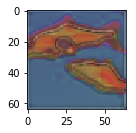

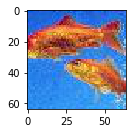

In [7]:
### Image visualisation
import matplotlib.pyplot as plt
import numpy.random as rnd

#def rgb2gray2(rgb):
 #   a = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
  #  return a

rand_indices = np.random.choice(40,24)
#sample_images = X_train[rand_indices]
samp = Y_train[rand_indices]
#original_data = lab_data[rand_indices]
#sample_images = original_data[:,:,:,0:1]
#print (np.min(original_data[:,:,:,1:2]))
#print (np.max(original_data[:,:,:,1:2]))
#print (sample_images.shape)
#print (samp.shape)
#print (original_data.shape)

feed_dict = {Y:samp,is_training:True}
losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
show_images(rgb_o[0])
show_images(rgb_i[0])
#model_generated_images = sess.run([y_out,loss],feed_dict)
#print (model_generated_images[1])
#print(model_generated_images[0].shape)

def show_images(images,gray = False):

    
    if(gray):
        plt.subplot(221)
        plt.imshow(images,cmap = plt.get_cmap('gray'))
        #plt.subplot(222)
        #plt.imshow(images[1], cmap = plt.get_cmap('gray'))
        #plt.subplot(223)
        #plt.imshow(images[2], cmap = plt.get_cmap('gray'))
        #plt.subplot(224)
        #plt.imshow(images[3], cmap = plt.get_cmap('gray'))
    else :
        plt.subplot(221)
        plt.imshow(images);
        #plt.subplot(222)
        #plt.imshow(images[1])
        #plt.subplot(223)
        #plt.imshow(images[2])
        #plt.subplot(224)
        #plt.imshow(images[3])

    plt.show()
    
#show_images(lab2rgb(original_data[0,:,:,:]  ) )
#show_images((samp[0]).astype('uint8'))
#original_data[...,1:3] = model_generated_images[0]
#show_images(original_data[0,:,:,0],gray = True)
#show_images(lab2rgb(original_data[0,:,:,:]*std_dat +mean_dat))
#show_images((model_generated_images[0][0] ).astype('uint8'))
    